In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df1 = pd.read_excel('online_retail_II.xlsx', dtype ={'InvoiceNo': 'string','StockCode': 'string','Description': 'string','Country': 'string'})
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df1.shape

(525461, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  string        
 2   Description  522533 non-null  string        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 32.1+ MB


### Data Cleaning: Handle Missing Values

In [8]:
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
df1[df1.Description.isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,<NA>,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,<NA>,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,<NA>,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,<NA>,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,<NA>,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,<NA>,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,<NA>,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,<NA>,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,<NA>,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [10]:
# checking if null description stock code has other instances of the stock with given description
df1[df1.StockCode == '22139'].Description.mode()

0    RETRO SPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: string

In [11]:
most_freq = df1[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3515
1,22423,REGENCY CAKESTAND 3 TIER,2212
2,21232,STRAWBERRY CERAMIC TRINKET BOX,1843
3,21212,PACK OF 72 RETRO SPOT CAKE CASES,1466
4,84879,ASSORTED COLOUR BIRD ORNAMENT,1457
...,...,...,...
5065,16151A,found,1
5066,90214U,"LETTER ""U"" BLING KEY RING",1
5067,84858A,wet and rotting,1
5068,84807,display,1


In [12]:
most_freq[most_freq.StockCode == '85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3515


In [13]:
most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3515
1,22423,REGENCY CAKESTAND 3 TIER,2212
2,21232,STRAWBERRY CERAMIC TRINKET BOX,1843
3,21212,PACK OF 72 RETRO SPOT CAKE CASES,1466
4,84879,ASSORTED COLOUR BIRD ORNAMENT,1457
...,...,...,...
5065,16151A,found,1
5066,90214U,"LETTER ""U"" BLING KEY RING",1
5067,84858A,wet and rotting,1
5068,84807,display,1


In [14]:
most_freq.columns = ["StockCode","Freq_Description","count"]
df2 = df1.merge(most_freq, on = 'StockCode', how = 'left')
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0


In [15]:
df2['Description'] = df2['Freq_Description']
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0


In [16]:
df2.isnull().sum()

Invoice                  0
StockCode                0
Description            365
Quantity                 0
InvoiceDate              0
Price                    0
Customer ID         143793
Country                  0
Freq_Description       365
count                  365
dtype: int64

In [17]:
df2.dropna(subset = ['Description'], inplace = True)
df2.isnull().sum()

Invoice                  0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
Price                    0
Customer ID         143428
Country                  0
Freq_Description         0
count                    0
dtype: int64

In [18]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0


In [19]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID,count
count,730390.000000,730390,730390.000000,586962.000000,730390.000000
mean,10.282894,2010-06-28 06:06:48.729802496,4.723106,15335.523755,318.365269
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000,1.000000
25%,1.000000,2010-03-23 09:57:00,1.250000,13959.000000,62.000000
50%,3.000000,2010-07-05 10:07:00,2.510000,15291.000000,204.000000
75%,10.000000,2010-10-14 09:35:00,4.950000,16787.000000,422.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,3515.000000
std,109.000353,NaN,126.291090,1682.893640,399.159612


In [20]:
df2[df2.Price<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
248046,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,Adjust bad debt,3.0
387179,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,Adjust bad debt,3.0
565728,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,Adjust bad debt,3.0


In [21]:
df3 = df2[(df2.Price>0) & (df2.Quantity>0)]

In [22]:
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0


In [23]:
df3.describe()

,Quantity,InvoiceDate,Price,Customer ID,count
count,710163.000000,710163,710163.000000,571770.000000,710163.000000
mean,11.428262,2010-06-28 12:12:08.337494528,4.358164,15344.374703,319.713916
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,1.000000
25%,1.000000,2010-03-23 11:01:00,1.250000,13971.000000,64.000000
50%,3.000000,2010-07-05 12:40:00,2.510000,15301.000000,206.000000
75%,10.000000,2010-10-14 12:44:00,4.650000,16791.000000,423.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,3515.000000
std,83.751844,NaN,54.887608,1681.691926,398.318665


In [24]:
# To check outliers and remove them, quantile function is used.
df3.Quantity.quantile(0.999)

np.float64(504.0)

In [25]:
df3[df3.Quantity>1500]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count
9917,490018,21981,PACK OF 12 WOODLAND TISSUES,4320,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,PACK OF 12 WOODLAND TISSUES,317.0
9918,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,PACK OF 12 SKULL TISSUES,276.0
9919,490018,21967,MIA,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,MIA,1.0
9920,490018,21984,PACK OF 12 PINK PAISLEY TISSUES,4008,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,PACK OF 12 PINK PAISLEY TISSUES,247.0
9921,490018,21980,PACK OF 12 RED SPOTTY TISSUES,4008,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,PACK OF 12 RED SPOTTY TISSUES,276.0
...,...,...,...,...,...,...,...,...,...,...
661667,534036,84992,72 SWEETHEART FAIRY CAKE CASES,1680,2010-11-19 15:51:00,0.40,13027.0,United Kingdom,72 SWEETHEART FAIRY CAKE CASES,922.0
676496,534774,17003,BROCADE RING PURSE,1584,2010-11-24 11:03:00,0.19,15838.0,United Kingdom,BROCADE RING PURSE,238.0
707114,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,ASSORTED COLOUR T-LIGHT HOLDER,173.0
707115,536809,84950,dotcom,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,dotcom,1.0


### Feature Engineering: Create New Columns

In [26]:
df4 = df3.copy()
df4['TotalPrice'] = df4.Quantity * df4.Price
df4.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0,81.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0,81.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0,100.8


In [27]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count,TotalPrice,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0,83.4,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0,81.0,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0,81.0,12


### Visualization and EDA

##### 1. Plot Monthly Sales

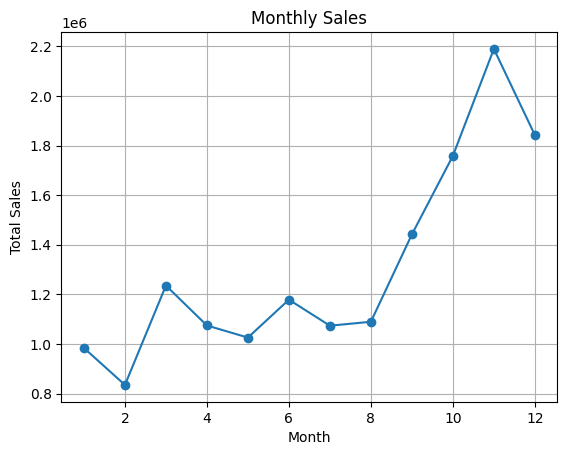

In [28]:
monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='line',title='Monthly Sales',marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


**Insights**

Total sales started raising up in August having a peak in november. This is likely due to holiday season at the year. 

#### 2. Top 5 Countries by Sales

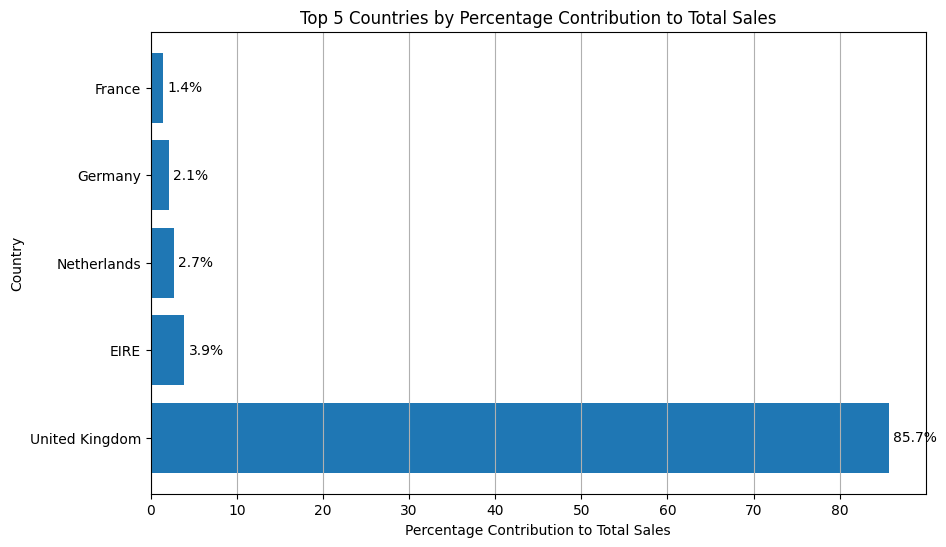

In [29]:
country_wise_sales = df4.groupby('Country')['TotalPrice'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries/total_sales)*100

plt.figure(figsize=(10,6))
bars = plt.barh(top_5_countries.index,percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bar

for bar, percentage in zip(bars,percentages):
    plt.text(bar.get_width()+0.5,bar.get_y()+bar.get_height()/2, f'{percentage:.1f}%',va ='center')

plt.show()

**Insights**

1. UK has the highest sales (around 9 million)
2. Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

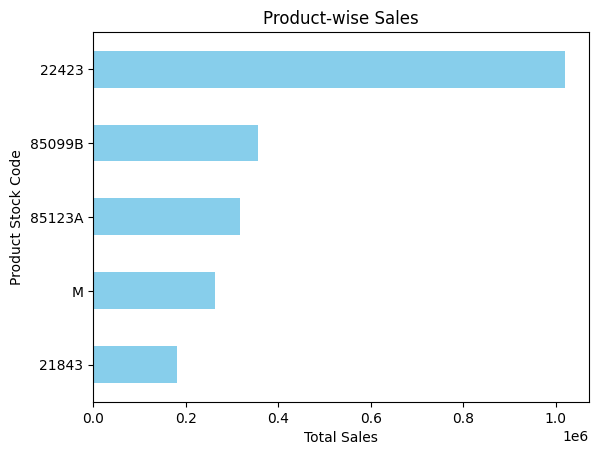

In [30]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color = 'skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis() # To show the highest sales at the top
plt.show()

In [31]:
# Decription of top 5 Products 

for stock_code in top_5_products.index:
    description = df4[df4.StockCode == stock_code].Description.iloc[0]
    print(f'{stock_code}==>{description}')

22423==>REGENCY CAKESTAND 3 TIER
85099B==>JUMBO BAG RED RETROSPOT
85123A==>WHITE HANGING HEART T-LIGHT HOLDER
M==>Manual
21843==>RED RETROSPOT CAKE STAND


*** Insights ***

22423 (REGENCY CAKESTAND 3 TIER) is the product with most sales

### RFM Analysis

In [32]:
current_date = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_date

Timestamp('2010-12-10 20:01:00')

In [33]:
rfm = df4.groupby('Customer ID').agg({
    'InvoiceDate' : lambda x:(current_date - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,60,567.77
12347.0,3,98,1946.03
12348.0,74,26,293.08
12349.0,43,160,4464.84
12351.0,11,29,411.78


In [34]:
rfm.describe()

,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000
mean,91.171846,132.599722,3168.052907
std,96.860633,283.688378,14409.341771
min,1.000000,1.000000,2.950000
25%,18.000000,25.000000,424.162500
50%,53.000000,61.000000,1002.825000
75%,136.000000,144.000000,2530.100000
max,374.000000,7822.000000,532998.960000


In [35]:
# Segment Customers based on RFM

rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [36]:
rfm.sample(5)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
Customer ID,,,,,,,
16082.0,306,17,109.30,1,1,1,3
17974.0,17,302,1686.97,4,4,3,11
14271.0,45,34,127.21,3,2,1,6
13783.0,123,12,1626.93,2,1,3,6
17458.0,17,49,346.16,4,2,1,7


In [37]:
# Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
Customer ID,,,,,,,
18145.0,18,277,4139.99,4,4,4,12
18260.0,10,424,12306.33,4,4,4,12
18168.0,8,416,3949.75,4,4,4,12
12395.0,7,150,3027.06,4,4,4,12
14156.0,7,3924,330590.40,4,4,4,12
...,...,...,...,...,...,...,...
17245.0,325,19,221.71,1,1,1,3
17246.0,182,7,48.87,1,1,1,3
14943.0,299,5,107.62,1,1,1,3


#### 5. Customer Churn Analysis

In [38]:
df4.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Freq_Description,count,TotalPrice,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,319.0,83.4,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,349.0,81.0,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,249.0,81.0,12
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,226.0,81.0,12
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",213.0,100.8,12


In [39]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("Customer ID")['InvoiceDate'].max()
customer_last_purchase.head(5)

Customer ID
12346.0   2010-06-28 13:53:00
12347.0   2010-12-07 14:57:00
12348.0   2010-09-27 14:59:00
12349.0   2010-10-28 08:23:00
12351.0   2010-11-29 15:23:00
Name: InvoiceDate, dtype: datetime64[ns]

In [40]:
type(customer_last_purchase)

pandas.core.series.Series

In [41]:
current_date

Timestamp('2010-12-10 20:01:00')

In [42]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

Customer ID
12346.0    165
12347.0      3
12348.0     74
12349.0     43
12351.0     11
Name: InvoiceDate, dtype: int64

In [43]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

Customer ID
12346.0    165
12355.0    203
12361.0     98
12362.0    374
12366.0    269
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1435


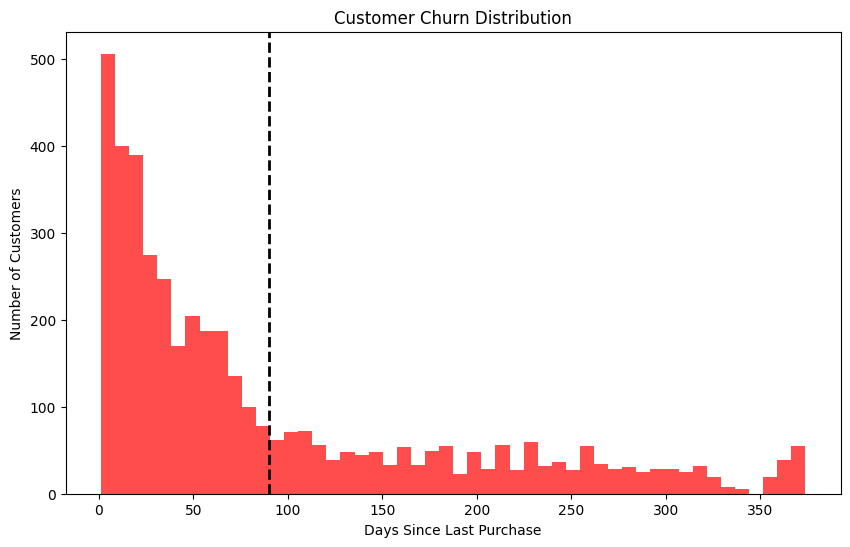

In [44]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()